In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# for grid

In [ ]:
! rm -r '/content/for grid'

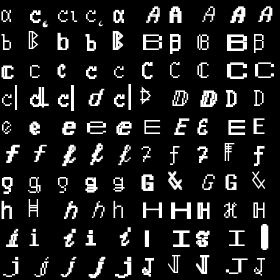

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import zipfile

# set the zip file path and extract the contents to a directory
zip_file_path = "/content/for grid.zip"
folder_path = "/content/for grid/for grid/for grid"
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(folder_path)

# get a list of all image file names in the folder
image_files = [os.path.join(folder_path, f) for f in sorted(os.listdir(folder_path),key=lambda x: (x[0].lower(), x[0].isupper())) if os.path.isfile(os.path.join(folder_path, f))]
# print(image_files)

# set the number of images per row and column
num_rows = 10
num_cols = 10

# create an empty grid for the images
grid = np.zeros((num_rows * 28, num_cols * 28), dtype=np.uint8)

# iterate over each image and place it in the grid
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < len(image_files):
            # load the image and resize it to 28x28 pixels
            img = Image.open(image_files[index]).convert('L')
            img = img.resize((28, 28), resample=Image.LANCZOS)
            # add the image to the grid
            grid[i*28:(i+1)*28, j*28:(j+1)*28] = np.asarray(img)

# # display the grid of images
# plt.imshow(grid, cmap='gray')
# plt.axis('off')
# plt.show()


# create a PIL Image object from the NumPy array
grid_img = Image.fromarray(grid)

# save the image to a file
grid_img.save("grid.png")
grid_img

# Exploratory

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

import numpy as np

import pandas as pd
from tqdm import tqdm

In [ ]:
def draw_char(char: str, typeface: str, size: int) -> Image:
    # font = ImageFont.truetype(f'{typeface}.ttf', size)
    font = ImageFont.load_default()
    img = Image.new('L', (size, size))
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), char, 255, font=font)
    return img


def render(char: str, typeface='Helvetica', size=10) -> np.ndarray:
    img = draw_char(char, typeface=typeface, size=size)
    return np.asarray(img)


def encode_char(char, typeface='Helvetica', size=10):
    img = draw_char(char, typeface=typeface, size=size)
    grayscale = np.asarray(img)
    bitmap = (grayscale > 0).astype('uint8')
    return ''.join(map(str, (bit for row in bitmap for bit in row)))

In [ ]:

# char_codes = pd.DataFrame(
#     {
#         'char': chr(i),
#         'code': encode_char(char, size=20),
#         'n_bits': sum(bit == '1' for bit in code)
#     }
#     for i in tqdm(range(0x10ffff))
# )

# Using [homoglyphs](https://pypi.org/project/homoglyphs/) library

In [ ]:
! pip install homoglyphs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.2 MB/s 


In [ ]:
import homoglyphs as hg
import pandas as pd
import pickle

In [ ]:
# get homoglyphs (latin alphabet initialized by default)
# hg.Homoglyphs().get_combinations('aao')

In [ ]:
alphabets = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
alpha_hg = {i:hg.Homoglyphs().get_combinations(i) for i in alphabets}

# alpha_hg

In [ ]:
combinations= ['rn','cl', 'vv','ci']
comb_hg = {i:hg.Homoglyphs().get_combinations(i) for i in combinations}

# comb_hg


In [ ]:
comb_alpha = {'rn':'m','cl':'d', 'vv':'w','ci':'a','\/\/':'W'}

for comb,alpha in comb_alpha.items():
  alpha_hg[alpha].extend(comb_hg[comb])


In [ ]:
alpha_hg['d']

In [ ]:
with open(r'/content/drive/MyDrive/Homoglyphed code-mixed/Datsets/homoglyphs/mapped_homoglyphs.pkl', 'wb') as f:
    pickle.dump(alpha_hg, f)

# Created homoglyphed emnist dataset

In [ ]:
with open(r'/content/drive/MyDrive/Homoglyphed code-mixed/Datsets/homoglyphs/mapped_homoglyphs.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)